In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE 

In [2]:
pd.set_option('display.max_columns', None) #so the maximum number of columns are displayed in .head()

In [19]:
#Loading the dataset on a datafdrame data
data = pd.read_csv("Android_Malware.csv")

C:\Users\Akshat\AppData\Local\Temp\ipykernel_16904\2565550375.py:2: DtypeWarning: Columns (56,58,63) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Android_Malware.csv")


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355630 entries, 0 to 355629
Data columns (total 86 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    355630 non-null  int64  
 1   Flow ID                       355629 non-null  object 
 2    Source IP                    355630 non-null  object 
 3    Source Port                  355630 non-null  int64  
 4    Destination IP               355630 non-null  object 
 5    Destination Port             355630 non-null  float64
 6    Protocol                     355630 non-null  float64
 7    Timestamp                    355630 non-null  object 
 8    Flow Duration                355630 non-null  int64  
 9    Total Fwd Packets            355630 non-null  int64  
 10   Total Backward Packets       355630 non-null  int64  
 11  Total Length of Fwd Packets   355630 non-null  float64
 12   Total Length of Bwd Packets  355630 non-nul

In [21]:
data.columns = [i.strip() for i in data.columns] # stripping all the whitespaces from the column names

In [22]:
#Dropping all the missing values from data
print(data.isnull().sum())
data = data.dropna()

Unnamed: 0        0
Flow ID           1
Source IP         0
Source Port       0
Destination IP    0
                 ..
Idle Mean         4
Idle Std          4
Idle Max          4
Idle Min          4
Label             0
Length: 86, dtype: int64


In [23]:
#Dropping Android_Adware and Android_Scareware
data['Label'].unique()
labels_to_remove = ['Android_Adware', 'Android_Scareware']
data = data[~data['Label'].isin(labels_to_remove)]
for column in data.columns:
    if 'Timestamp' in column:
        data = data.drop(column, axis = 1)

In [24]:
for column in data.columns:
    if len(data[column].unique()) > 1:
        count = 0
        if str(data[column].unique()[0]) != str(data[column].unique()[1]):
                count += 1
        if (count == 0):
            print('Same Unique Values : ',column)
            data = data.drop(column, axis = 1)
    elif len(data[column].unique()) == 1:
        print('Only 1 value : ', column)
        data = data.drop(column, axis = 1)

Only 1 value :  Bwd PSH Flags
Only 1 value :  Fwd URG Flags
Only 1 value :  Bwd URG Flags
Only 1 value :  RST Flag Count
Same Unique Values :  CWE Flag Count
Only 1 value :  ECE Flag Count
Same Unique Values :  Fwd Avg Bytes/Bulk
Only 1 value :  Fwd Avg Packets/Bulk
Only 1 value :  Fwd Avg Bulk Rate
Only 1 value :  Bwd Avg Bytes/Bulk
Only 1 value :  Bwd Avg Packets/Bulk
Only 1 value :  Bwd Avg Bulk Rate


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91102 entries, 264525 to 355629
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   91102 non-null  int64  
 1   Flow ID                      91102 non-null  object 
 2   Source IP                    91102 non-null  object 
 3   Source Port                  91102 non-null  int64  
 4   Destination IP               91102 non-null  object 
 5   Destination Port             91102 non-null  float64
 6   Protocol                     91102 non-null  float64
 7   Flow Duration                91102 non-null  int64  
 8   Total Fwd Packets            91102 non-null  int64  
 9   Total Backward Packets       91102 non-null  int64  
 10  Total Length of Fwd Packets  91102 non-null  float64
 11  Total Length of Bwd Packets  91102 non-null  float64
 12  Fwd Packet Length Max        91102 non-null  float64
 13  Fwd Packet Leng

In [28]:
data['Down/Up Ratio']  = [float(x) for x in data['Down/Up Ratio'].values]

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91102 entries, 264525 to 355629
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   91102 non-null  int64  
 1   Flow ID                      91102 non-null  object 
 2   Source IP                    91102 non-null  object 
 3   Source Port                  91102 non-null  int64  
 4   Destination IP               91102 non-null  object 
 5   Destination Port             91102 non-null  float64
 6   Protocol                     91102 non-null  float64
 7   Flow Duration                91102 non-null  int64  
 8   Total Fwd Packets            91102 non-null  int64  
 9   Total Backward Packets       91102 non-null  int64  
 10  Total Length of Fwd Packets  91102 non-null  float64
 11  Total Length of Bwd Packets  91102 non-null  float64
 12  Fwd Packet Length Max        91102 non-null  float64
 13  Fwd Packet Leng

Class Distribution
Label
Android_SMS_Malware    67394
Benign                 23708
Name: count, dtype: int64


C:\Users\Akshat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akshat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akshat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Label', ylabel='count'>

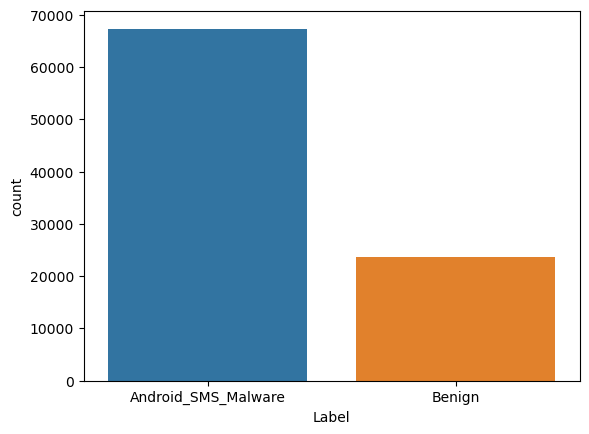

In [32]:
target_counts = data['Label'].value_counts()
# sns.countplot(data, x = 'Label')
print('Class Distribution')
print(target_counts)
sns.countplot(data, x = 'Label')

In [38]:
from category_encoders import TargetEncoder

In [43]:
oversample = SMOTE()
encoder = TargetEncoder()

x = data.drop(['Label'], axis = 1)
y = [data['Label'].unique().tolist().index(i) for i in data['Label']]

x = pd.DataFrame(encoder.fit_transform(x, y), columns = x.columns)

X, y = oversample.fit_resample(x, y)

C:\Users\Akshat\anaconda3\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
C:\Users\Akshat\anaconda3\Lib\site-packages\category_encoders\utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
C:\Users\Akshat\anaconda3\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
C:\Users\Akshat\anaconda3\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

In [50]:
X['Label'] = y
sns.countplot(X, x = 'Label')
data = X

In [51]:
len(data['Flow ID'].unique())

13289

In [52]:
len(data['Source IP'].unique())

17321

In [53]:
len(data['Destination IP'].unique())

25565

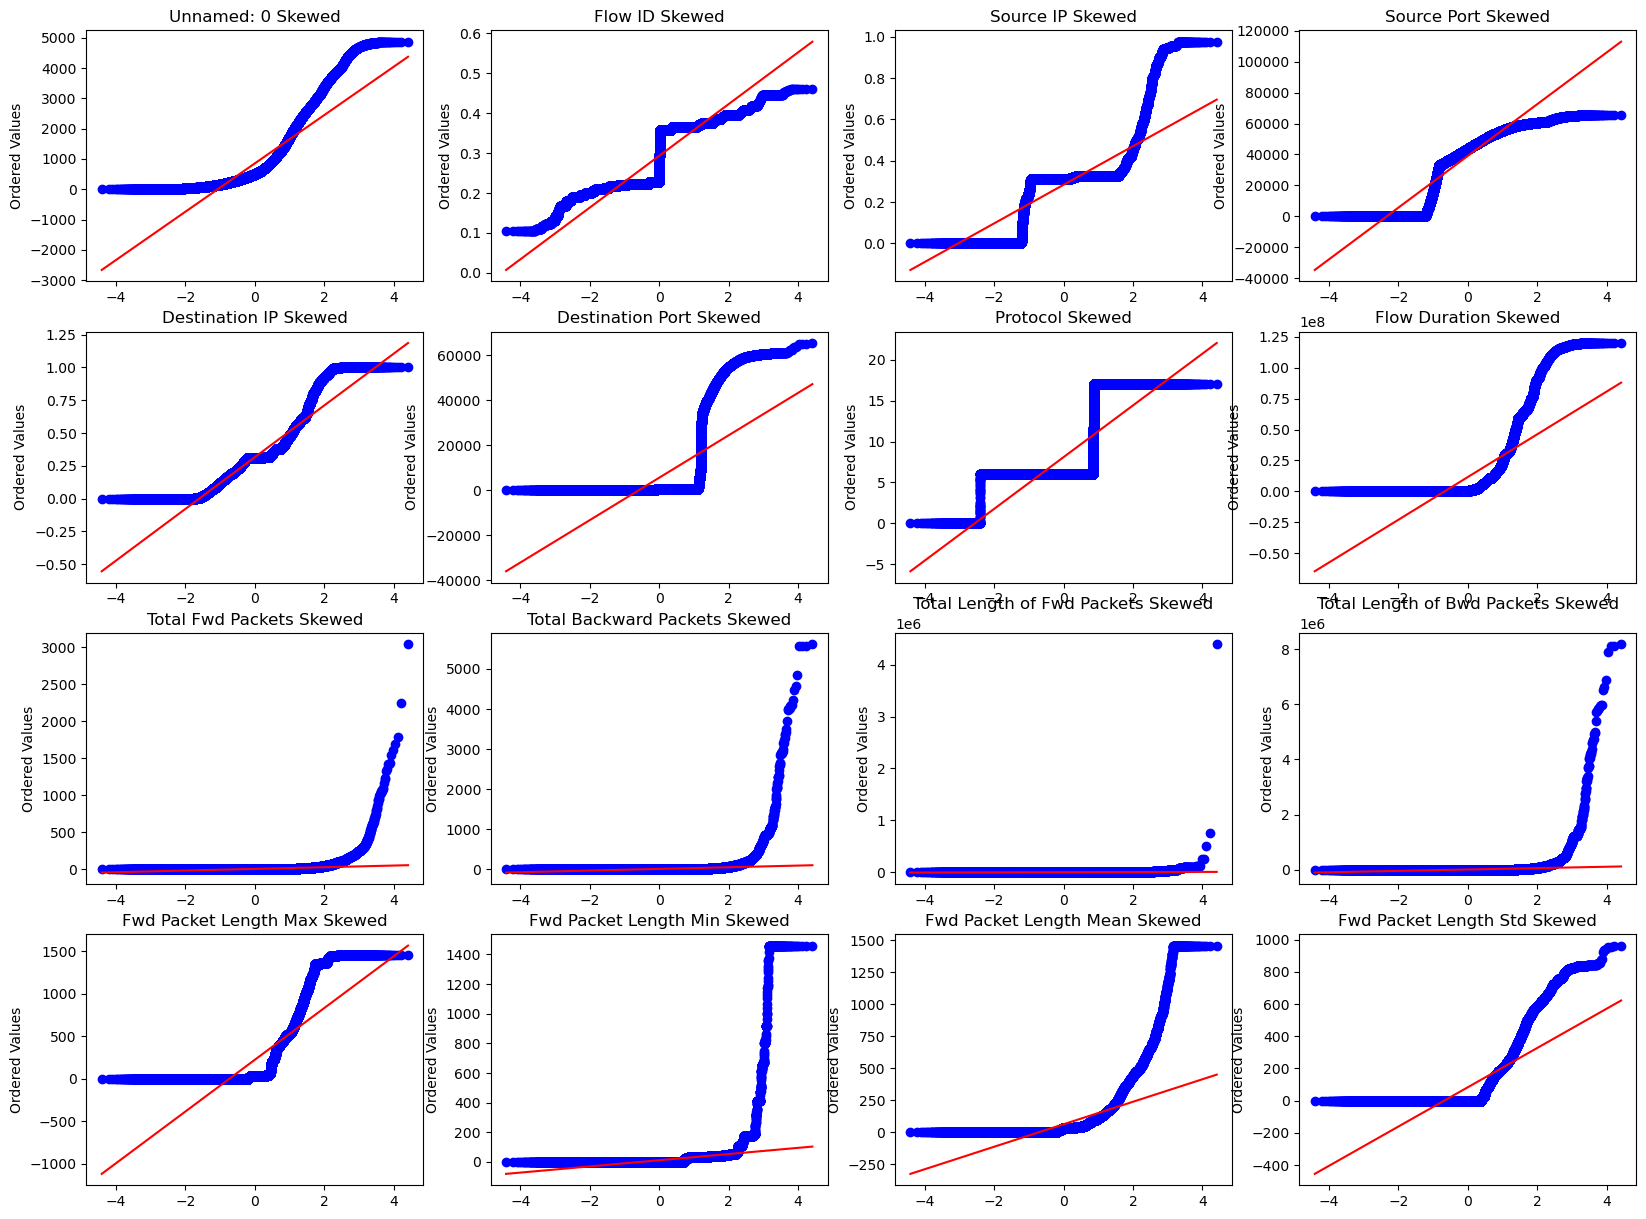

In [62]:
from scipy import stats
fig = plt.figure(figsize = (20, 15))
ax1 = fig.subplots(4, len(data.columns[:16])//4)
for i in range(4):
    for j in range(len(data.columns[:16])//4):
        prob = stats.probplot(data[data.columns[i * 4 + j]],dist=stats.norm, plot=ax1[i][j])
        ax1[i][j].set_xlabel('')
        ax1[i][j].set_title(f'{data.columns[i * 4 + j]} Skewed')
plt.show()

Skewness for Features:
Unnamed: 0         1.652822
Flow ID            0.030917
Source IP         -0.486203
Source Port       -1.082468
Destination IP     1.080020
                    ...    
Active Min         9.658991
Idle Mean          4.016441
Idle Std          12.157168
Idle Max           3.811899
Idle Min           4.235346
Length: 72, dtype: float64


C:\Users\Akshat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akshat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akshat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


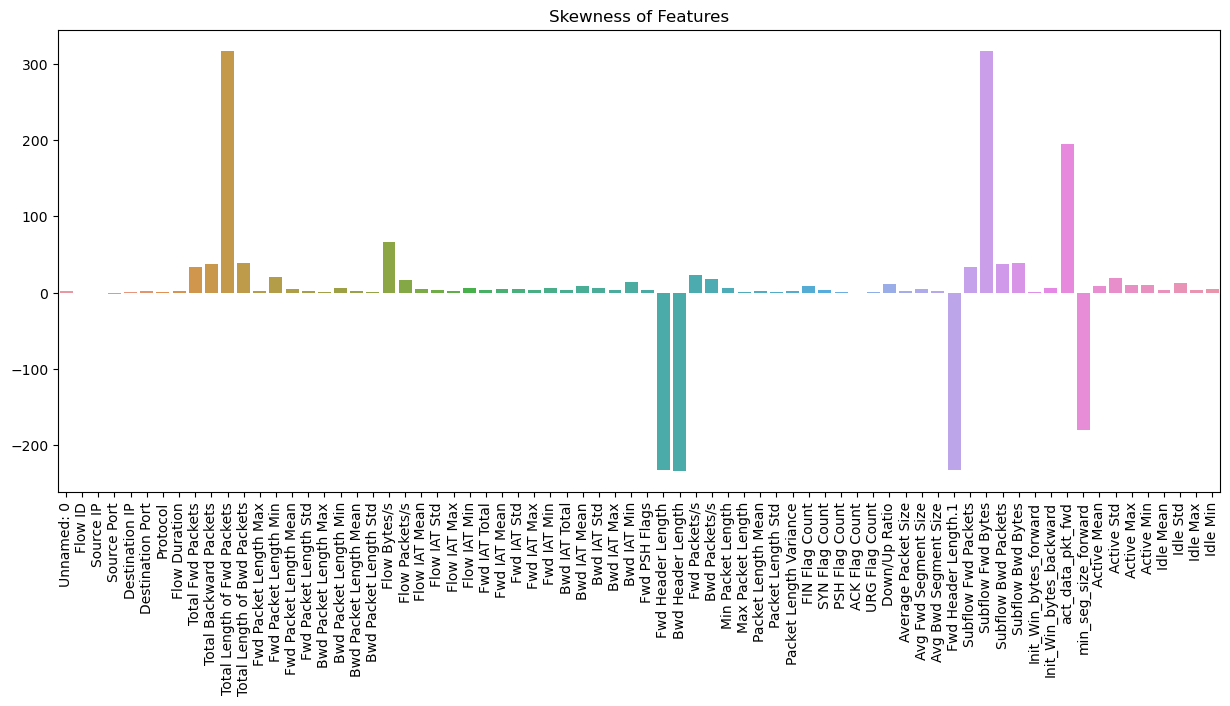

In [56]:
# Calculate skewness for each feature
skewness = data.drop("Label", axis=1).skew()
print("Skewness for Features:")
print(skewness)
s_skewness = sorted(skewness)
# Visualize the skewness of features
plt.figure(figsize=(15, 6))
sns.barplot(x=skewness.index, y=skewness.values)
plt.title("Skewness of Features")
plt.xticks(rotation=90)
plt.show()

C:\Users\Akshat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akshat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akshat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


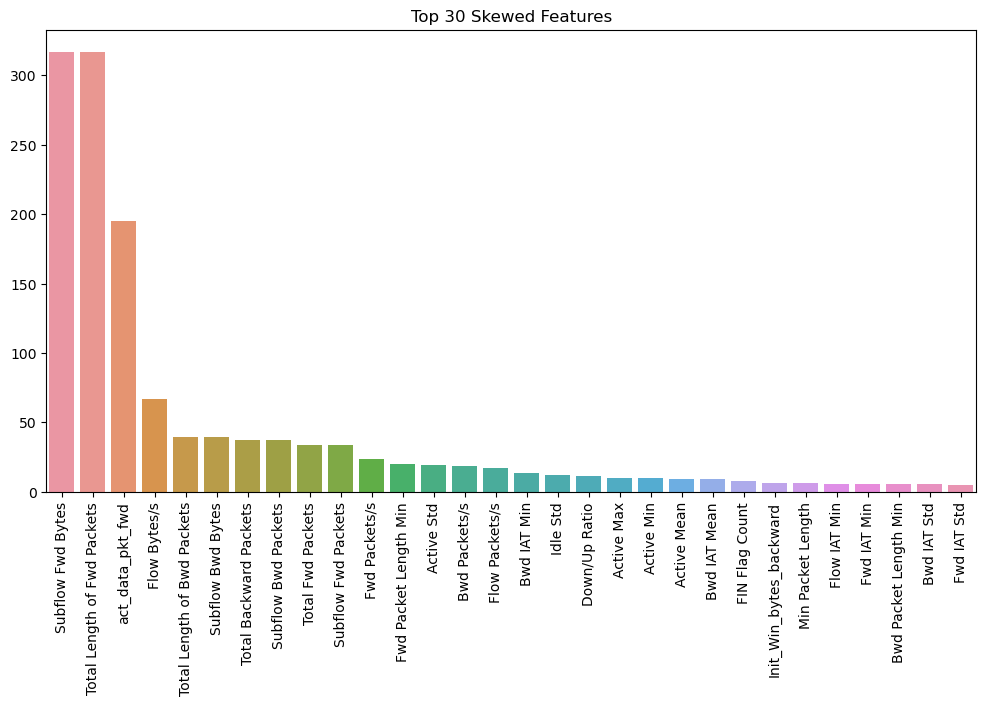

In [57]:
sorted_skewness = skewness.sort_values(ascending=False)

# Choose the top N features to plot
top_features_to_plot = 30  # Adjust as needed

# Plot the skewness of the top features
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_skewness.index[:top_features_to_plot], y=sorted_skewness.values[:top_features_to_plot])
plt.title("Top {} Skewed Features".format(top_features_to_plot))
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

C:\Users\Akshat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akshat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akshat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


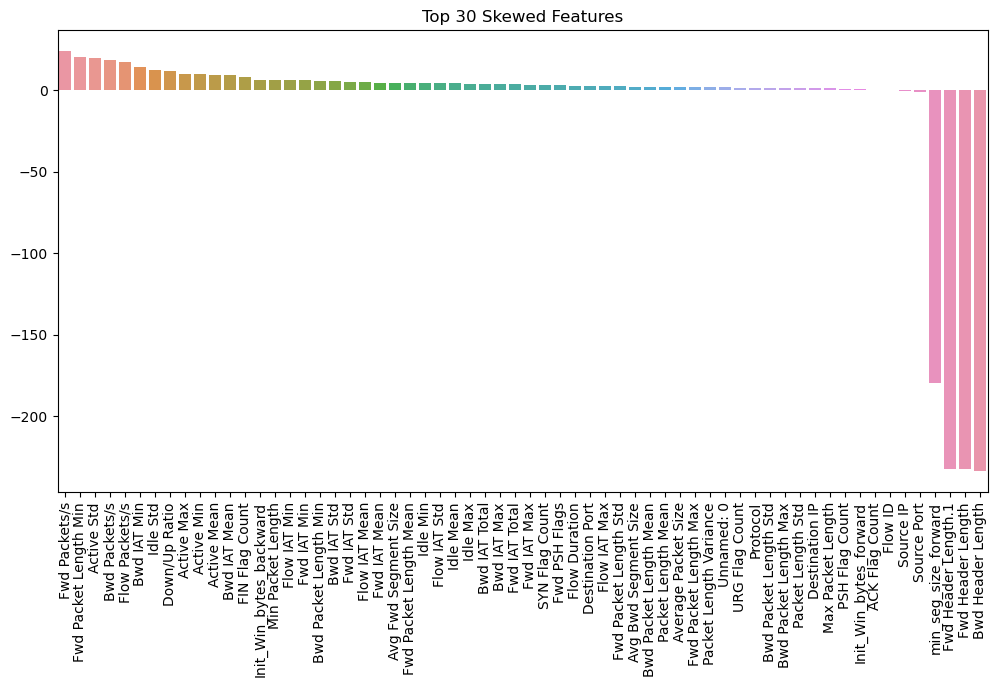

In [58]:
plt.figure(figsize=(12, 6))
last_10 = 10
sns.barplot(x=sorted_skewness.index[last_10:], y=sorted_skewness.values[last_10:])
plt.title("Top {} Skewed Features".format(top_features_to_plot))
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()